In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


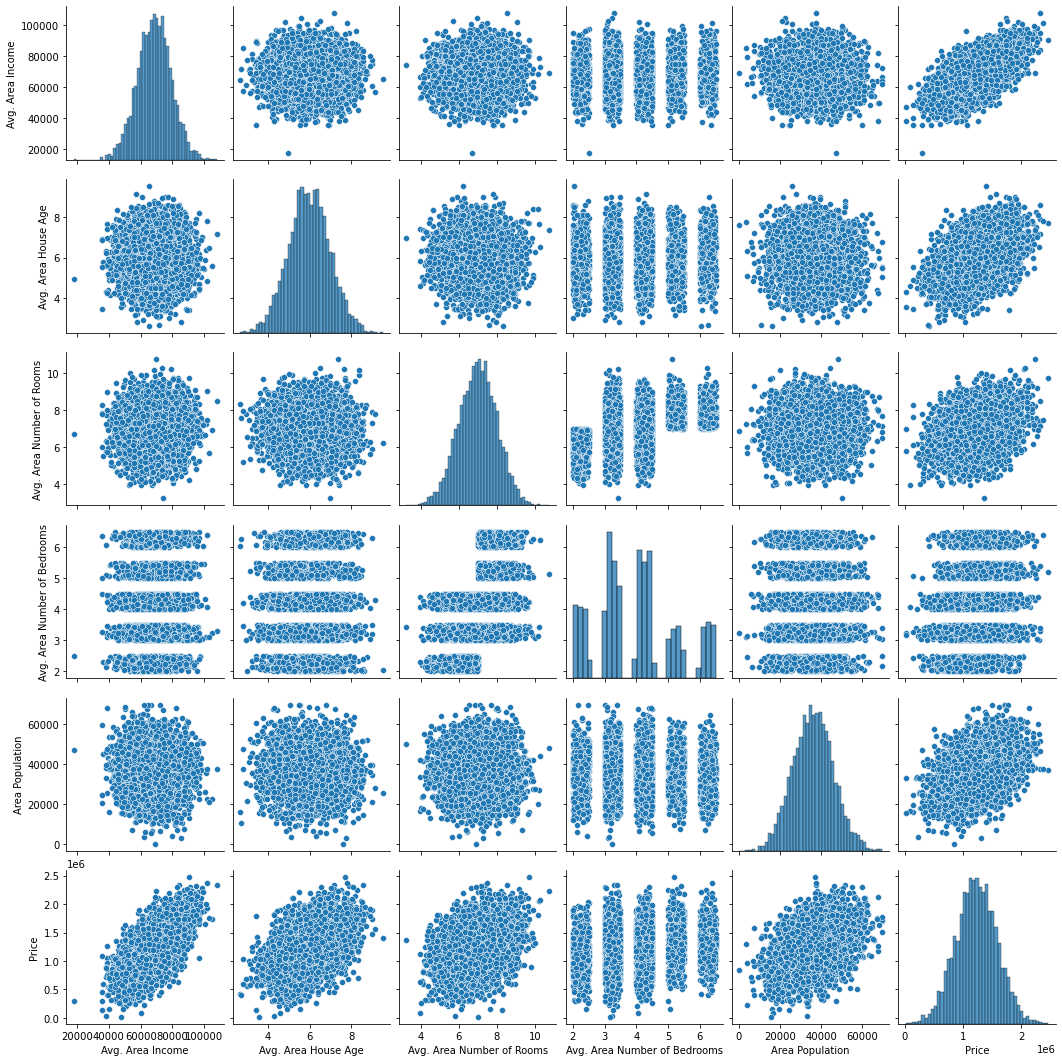

In [6]:
sns.pairplot(df)

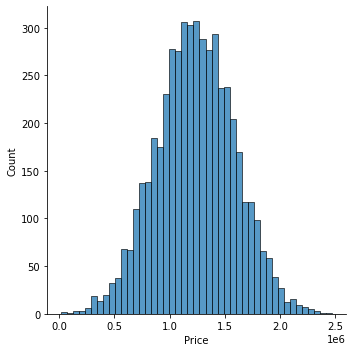

In [7]:
sns.displot(data=df, x="Price")

<AxesSubplot:>

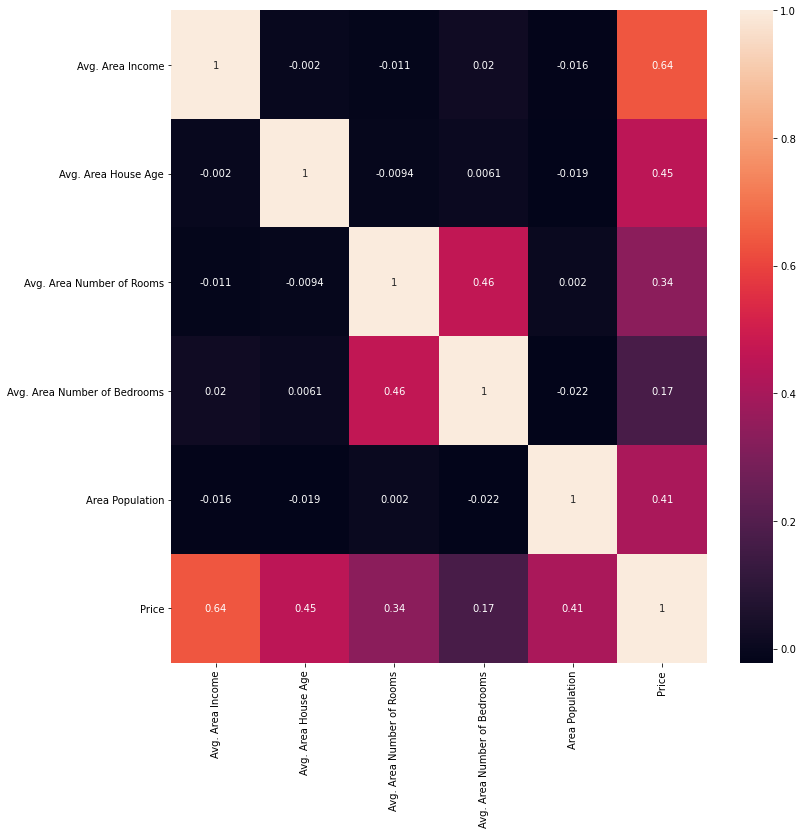

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [11]:
y = df[["Price"]]

In [12]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=61)

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
#train model
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
lm.intercept_

array([-2630809.49471501])

In [18]:
lm.coef_

array([[2.14260256e+01, 1.64015503e+05, 1.22340645e+05, 1.32121906e+03,
        1.52695523e+01]])

In [19]:
#predict
pred = lm.predict(X_test)

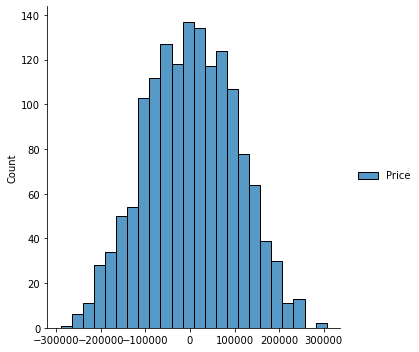

In [20]:
sns.displot(y_test-pred)

In [21]:
#evaluate model
from sklearn import metrics

In [22]:
metrics.mean_absolute_error(y_test, pred)

83684.79070444466

In [23]:
metrics.mean_squared_error(y_test, pred)

10493083953.50556

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

102435.75524935403

In [25]:
metrics.r2_score(y_test, pred)

0.9214355547108422

In [26]:
metrics.explained_variance_score(y_test, pred)

0.9214774617424957

##  Logistic Regression 

In [27]:
train = pd.read_csv("titanic_train.csv")

In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

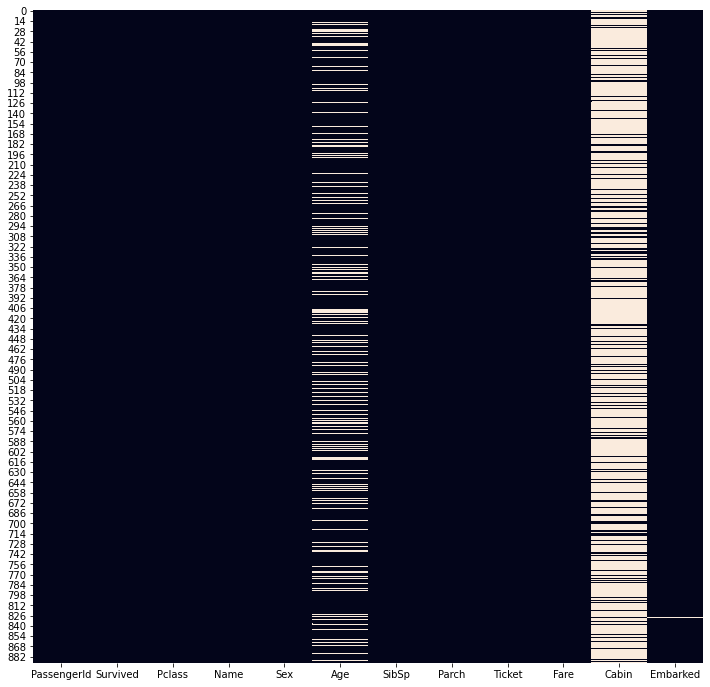

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(train.isna(), cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

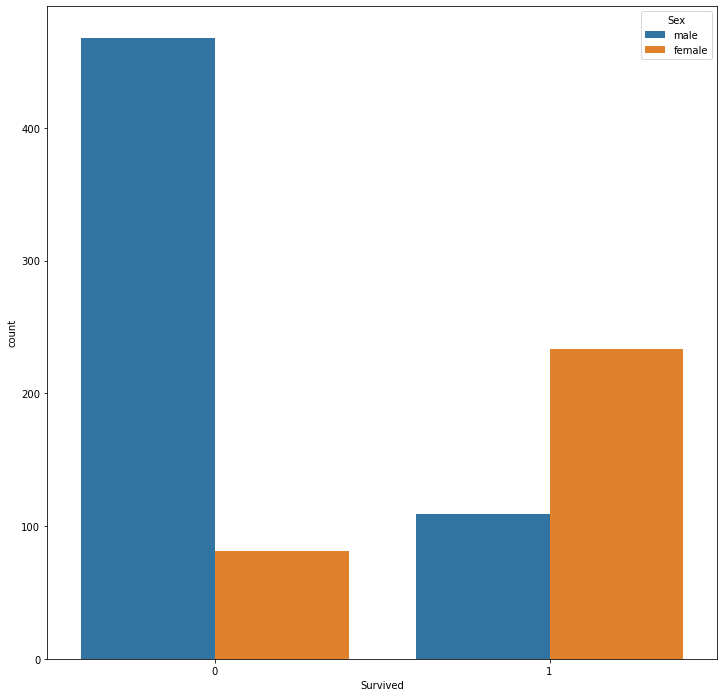

In [30]:
plt.figure(figsize=(12,12))
sns.countplot(data=train, x="Survived", hue="Sex")

<AxesSubplot:xlabel='Age', ylabel='Count'>

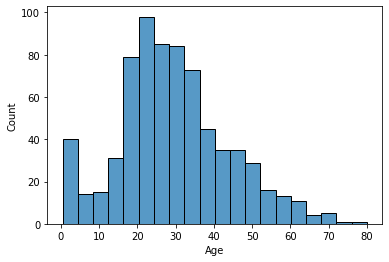

In [31]:
sns.histplot(data=train, x="Age")

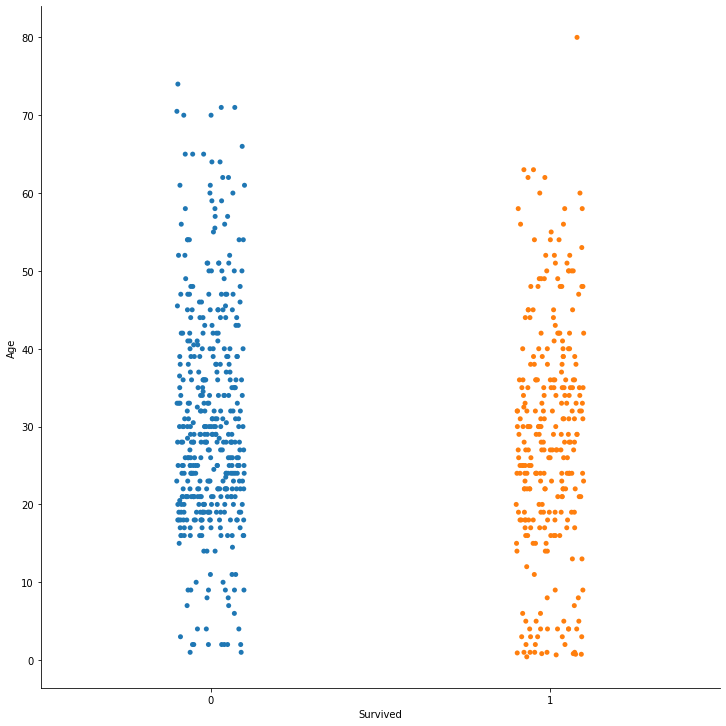

In [32]:
sns.catplot(data=train, y=train.Age.dropna(), x="Survived", height=10)

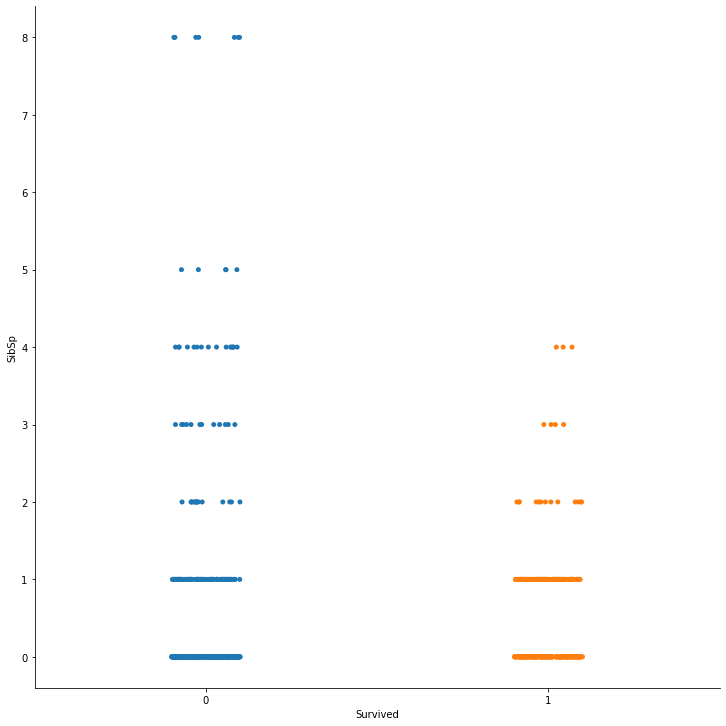

In [33]:
sns.catplot(data=train, y=train.SibSp.dropna(), x="Survived", height=10)

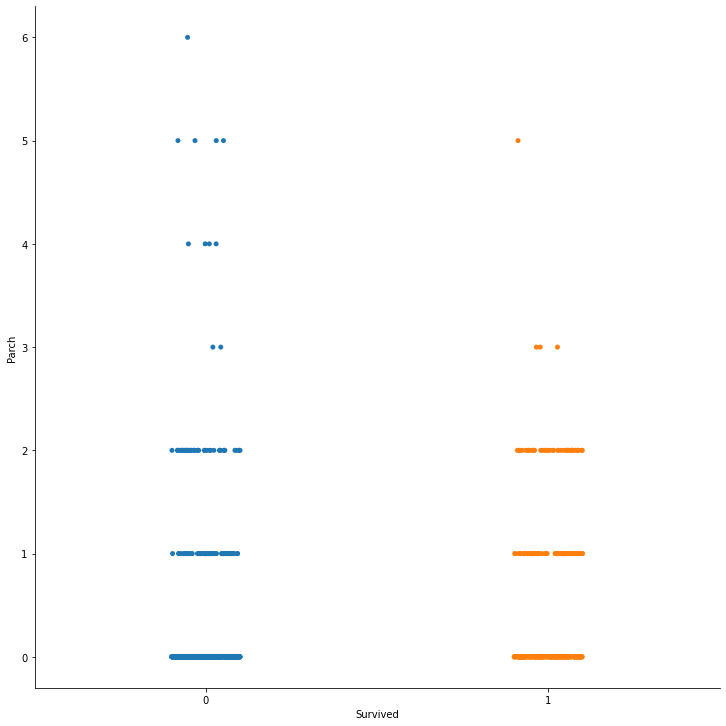

In [34]:
sns.catplot(data=train, y=train.Parch.dropna(), x="Survived", height=10)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

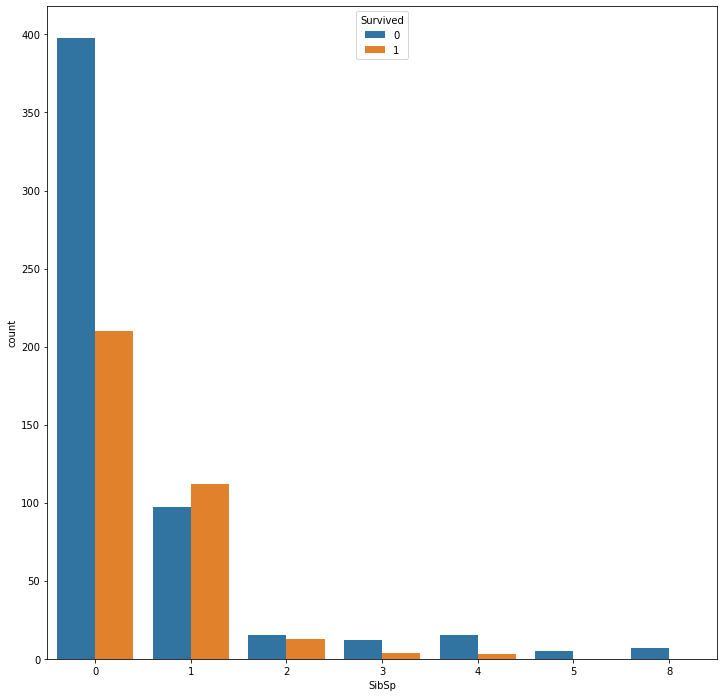

In [35]:
plt.figure(figsize=(12,12))
sns.countplot(data=train, x=train.SibSp, hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

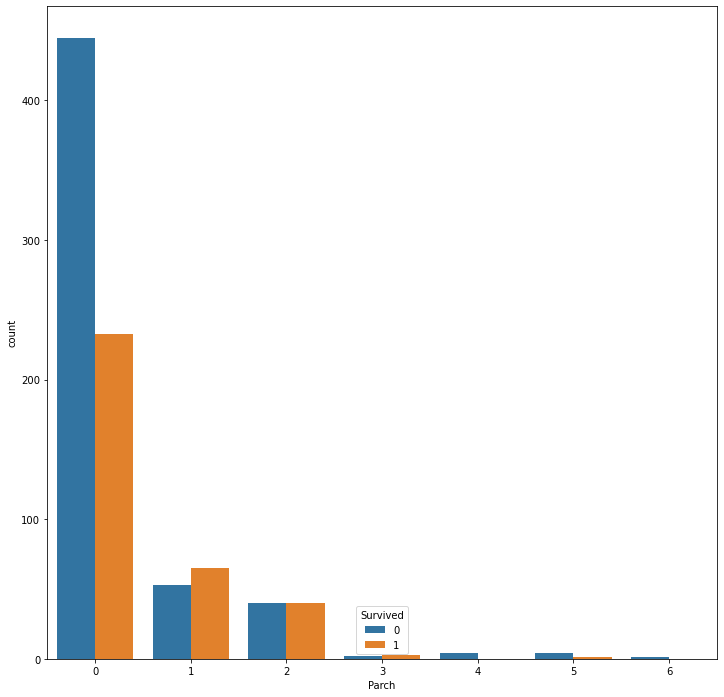

In [36]:
plt.figure(figsize=(12,12))
sns.countplot(data=train, x="Parch", hue="Survived")

<AxesSubplot:ylabel='count'>

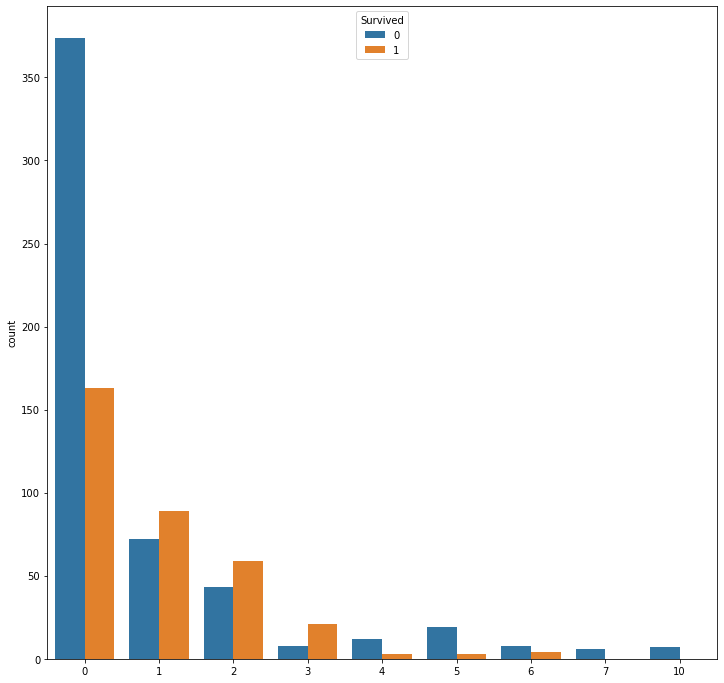

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(data=train, x=(train.Parch+train.SibSp), hue="Survived")

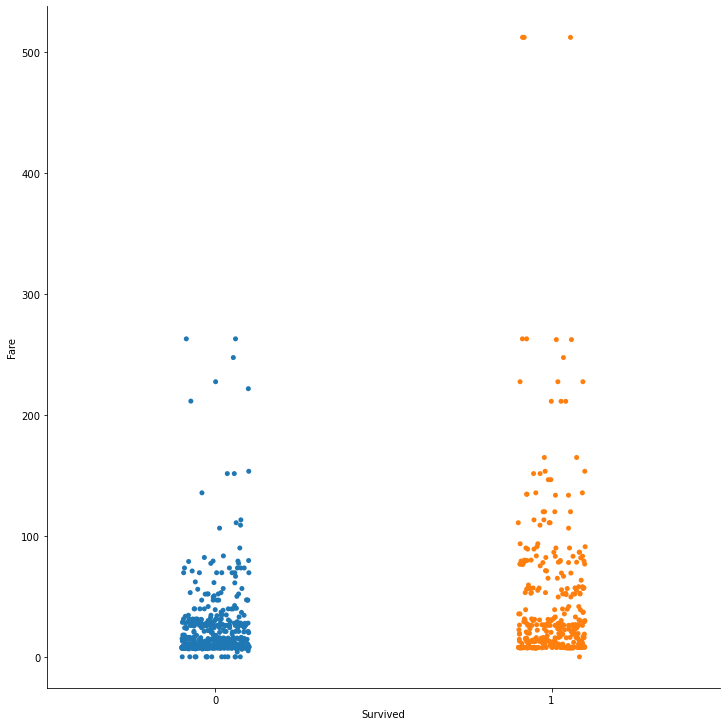

In [38]:
sns.catplot(data=train, y=train.Fare, x="Survived", height=10)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

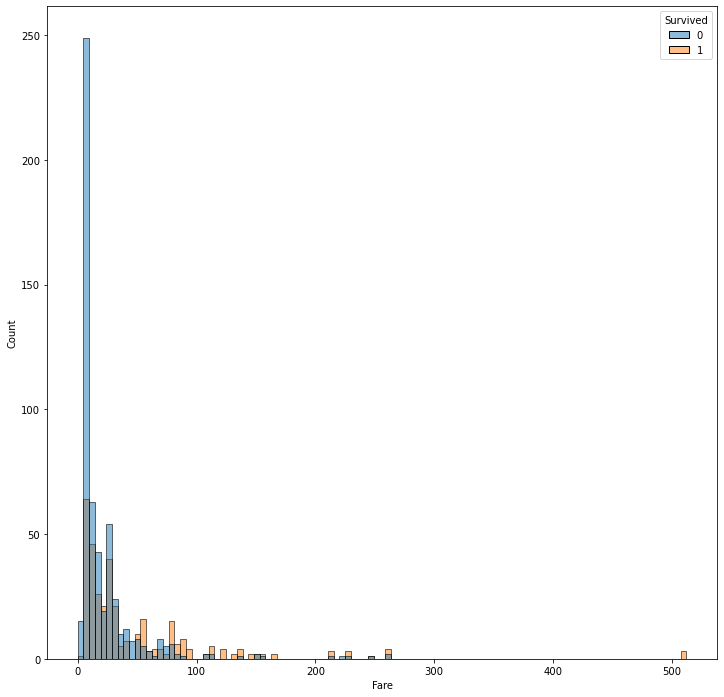

In [39]:
plt.figure(figsize=(12,12))
sns.histplot(data=train, x="Fare", hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

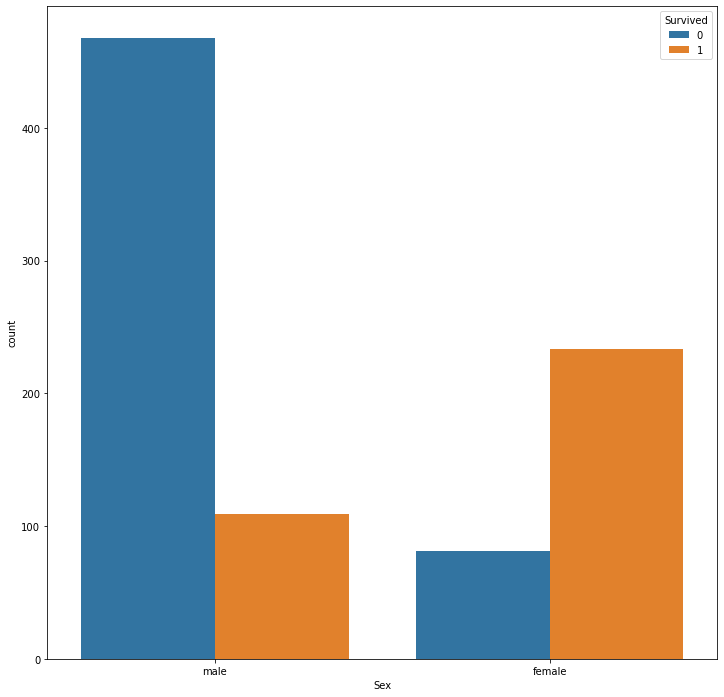

In [40]:
plt.figure(figsize=(12,12))
sns.countplot(data=train, x="Sex", hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

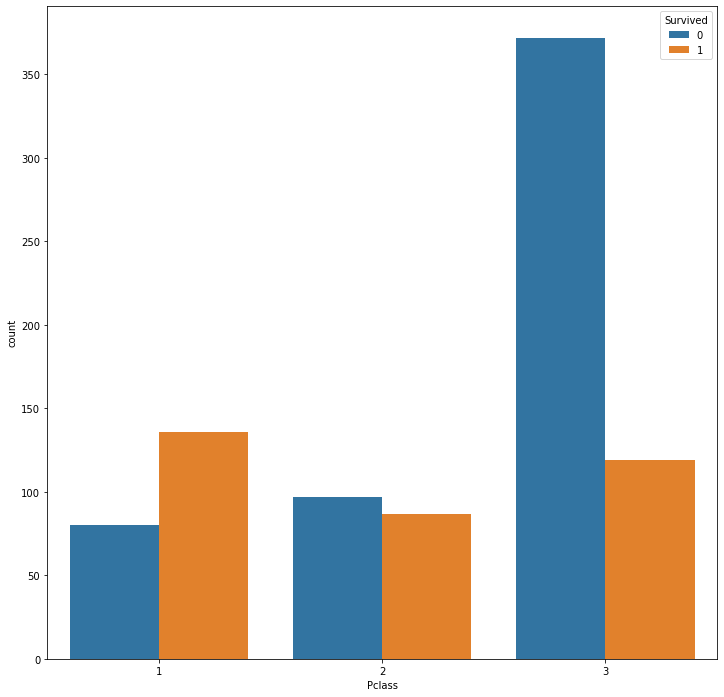

In [41]:
plt.figure(figsize=(12,12))
sns.countplot(data=train, x="Pclass", hue="Survived")

In [42]:
p1 = train[train["Pclass"]==1].Age.mean()

In [43]:
p2 = train[train["Pclass"]==2].Age.mean()

In [44]:
p3 = train[train["Pclass"]==3].Age.mean()

In [45]:
train.loc[train["Pclass"]==1].Age.isna().sum()

30

In [46]:
p11=train[train["Pclass"]==1].Age.fillna(p1)

In [47]:
p22=train[train["Pclass"]==2].Age.fillna(p2)

In [48]:
p33=train[train["Pclass"]==3].Age.fillna(p3)

In [49]:
px=pd.concat([p11,p22,p33])
px

1      38.00000
3      35.00000
6      54.00000
11     58.00000
23     28.00000
         ...   
882    22.00000
884    25.00000
885    39.00000
888    25.14062
890    32.00000
Name: Age, Length: 891, dtype: float64

In [50]:
train.Age=px

In [51]:
train.Age.isna().sum()

0

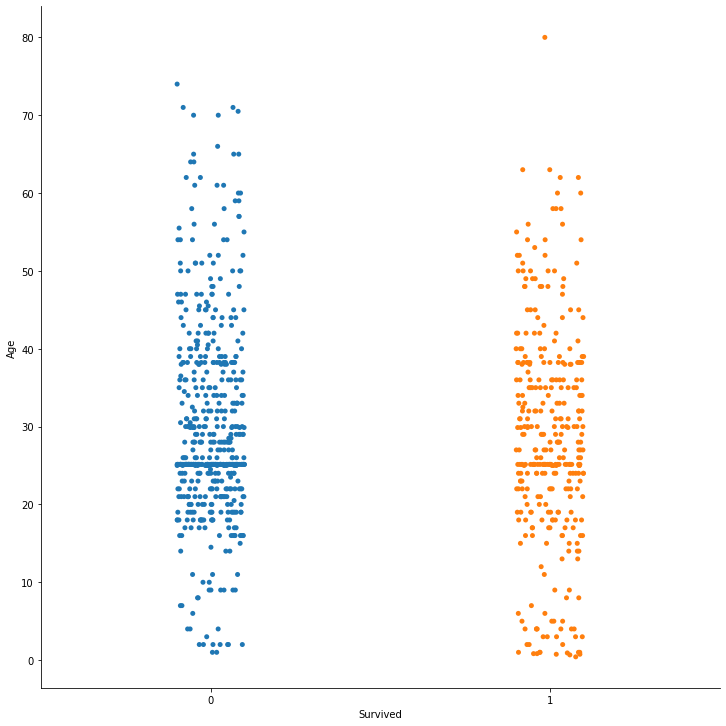

In [52]:
sns.catplot(data=train, y=train.Age.dropna(), x="Survived", height=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

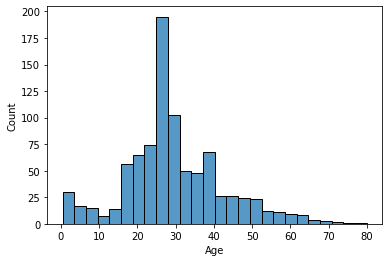

In [53]:
sns.histplot(data=train, x="Age")

<AxesSubplot:>

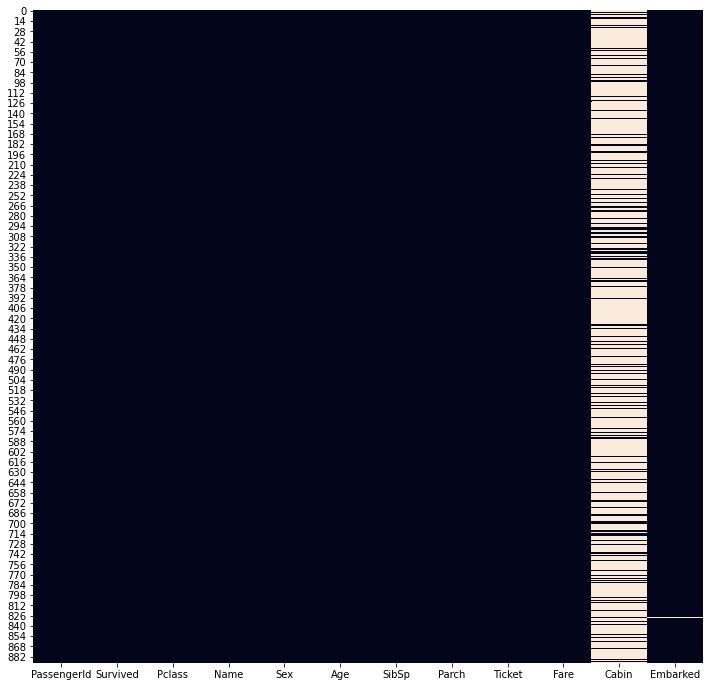

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(train.isna(), cbar=False)

In [55]:
train[train["Pclass"]==1].Age.mean()

38.233440860215026

In [56]:
train[train["Pclass"]==2].Age.mean()

29.877630057803472

In [57]:
train[train["Pclass"]==3].Age.mean()

25.140619718309818

In [58]:
train.drop("Cabin", axis=1,inplace=True)

In [59]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [60]:
train.dropna(inplace=True)

In [61]:
gender=pd.get_dummies(train["Sex"],drop_first=True)

In [62]:
embark=pd.get_dummies(train["Embarked"])

In [63]:
train=train.join(gender)

In [64]:
train=train.join(embark)

In [65]:
train.drop(["Sex","Embarked","Name","Ticket"], axis=1,inplace=True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [67]:
train.drop(["PassengerId"], axis=1,inplace=True)

In [68]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,0,1
1,1,1,38.00000,1,0,71.2833,0,1,0,0
2,1,3,26.00000,0,0,7.9250,0,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,0,1
887,1,1,19.00000,0,0,30.0000,0,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,0,1
889,1,1,26.00000,0,0,30.0000,1,1,0,0


In [69]:
pc=pd.get_dummies(train["Pclass"])

In [70]:
train=train.join(pc)

In [71]:
train.drop(["Pclass"], axis=1,inplace=True)

In [72]:
train

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3
0,0,22.00000,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.00000,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.00000,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.00000,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.00000,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,0,0,1,0,1,0
887,1,19.00000,0,0,30.0000,0,0,0,1,1,0,0
888,0,25.14062,1,2,23.4500,0,0,0,1,0,0,1
889,1,26.00000,0,0,30.0000,1,1,0,0,1,0,0


In [73]:
y = train["Survived"]

In [74]:
X = train.drop(["Survived"], axis=1)

In [75]:
X

,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3
0,22.00000,1,0,7.2500,1,0,0,1,0,0,1
1,38.00000,1,0,71.2833,0,1,0,0,1,0,0
2,26.00000,0,0,7.9250,0,0,0,1,0,0,1
3,35.00000,1,0,53.1000,0,0,0,1,1,0,0
4,35.00000,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,0,0,1,0,1,0
887,19.00000,0,0,30.0000,0,0,0,1,1,0,0
888,25.14062,1,2,23.4500,0,0,0,1,0,0,1
889,26.00000,0,0,30.0000,1,1,0,0,1,0,0


In [76]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=61)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression(max_iter=300)

In [80]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [81]:
pred = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       156
           1       0.75      0.75      0.75       111

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [84]:
print(confusion_matrix(y_test,pred))

[[128  28]
 [ 28  83]]


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
scaler.fit(X)

StandardScaler()

In [88]:
scaledX = scaler.transform(X)

In [89]:
sX=pd.DataFrame(scaledX,columns=X.columns)

In [90]:
sX

,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3
0,-0.550252,0.431350,-0.474326,-0.500240,0.735342,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328
1,0.664719,0.431350,-0.474326,0.788947,-1.359911,2.071634,-0.307941,-1.621287,1.776008,-0.510875,-1.110706
2,-0.246509,-0.475199,-0.474326,-0.486650,-1.359911,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328
3,0.436912,0.431350,-0.474326,0.422861,-1.359911,-0.482711,-0.307941,0.616794,1.776008,-0.510875,-1.110706
4,0.436912,-0.475199,-0.474326,-0.484133,0.735342,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328
...,...,...,...,...,...,...,...,...,...,...,...
884,-0.170574,-0.475199,-0.474326,-0.384475,0.735342,-0.482711,-0.307941,0.616794,-0.563060,1.957427,-1.110706
885,-0.778059,-0.475199,-0.474326,-0.042213,-1.359911,-0.482711,-0.307941,0.616794,1.776008,-0.510875,-1.110706
886,-0.311767,0.431350,2.006119,-0.174084,-1.359911,-0.482711,-0.307941,0.616794,-0.563060,-0.510875,0.900328
887,-0.246509,-0.475199,-0.474326,-0.042213,0.735342,2.071634,-0.307941,-1.621287,1.776008,-0.510875,-1.110706


In [91]:
X_train, X_test, y_train, y_test = train_test_split(sX,y,test_size=0.3,random_state=61)

In [92]:
logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       156
           1       0.73      0.75      0.74       111

    accuracy                           0.78       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.78      0.78      0.78       267

[[126  30]
 [ 28  83]]


In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

In [94]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [95]:
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       156
           1       0.79      0.61      0.69       111

    accuracy                           0.77       267
   macro avg       0.78      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267

[[138  18]
 [ 43  68]]


In [96]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=8)>

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [98]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       156
           1       0.75      0.75      0.75       111

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267

[[128  28]
 [ 28  83]]


## PCA (Principal Component Analysis)

In [99]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [100]:
df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])

In [101]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [103]:
scaled_df = scaler.fit_transform(df)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [129]:
x_pca = pca.fit_transform(scaled_df)

In [130]:
scaled_df.shape

(569, 30)

In [131]:
x_pca.shape

(569, 10)

In [132]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [133]:
df_pca = pd.DataFrame(pca.components_, columns=cancer["feature_names"])

In [134]:
df_pca

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151398,-0.072828,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084019,0.072469,-0.036170,0.228225,0.048360
8,-0.223110,0.112700,-0.223739,-0.195586,0.006425,-0.167842,0.040591,-0.111971,0.256040,-0.123740,...,-0.112142,0.103340,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060489,0.064638,-0.134174
9,0.095487,0.240935,0.086386,0.074957,-0.069293,0.012933,-0.135603,0.008054,0.572070,0.081105,...,0.077361,0.029550,0.050508,0.069921,-0.128304,-0.172135,-0.311636,-0.076648,-0.029563,0.012608


<AxesSubplot:>

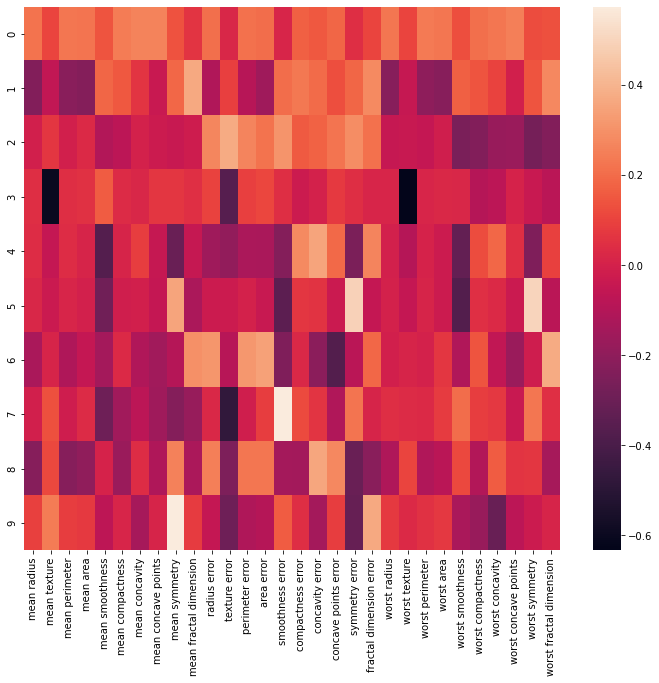

In [135]:
plt.figure(figsize=(12,10))
sns.heatmap(df_pca)

In [136]:
pca.explained_variance_ratio_.sum()

0.9515688143285191

In [137]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])